In [161]:
# https://pandas.pydata.org/docs/user_guide/10min.html
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Object creation

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20210101", periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2021-01-01,1.276648,0.000314,-2.033920,-1.363981
2021-01-02,-0.744951,0.012518,0.754155,-1.553973
2021-01-03,-0.668628,-0.768544,1.015269,1.261130
2021-01-04,0.158819,-0.508093,-0.766951,2.565576
2021-01-05,-0.915861,-0.598327,0.900838,0.929305
2021-01-06,-0.240640,-0.511860,0.384052,0.785751


In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20210101"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2021-01-01,1.0,3,test,foo
1,1.0,2021-01-01,1.0,3,train,foo
2,1.0,2021-01-01,1.0,3,test,foo
3,1.0,2021-01-01,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

In [7]:
df.head()

,A,B,C,D
2021-01-01,1.276648,0.000314,-2.033920,-1.363981
2021-01-02,-0.744951,0.012518,0.754155,-1.553973
2021-01-03,-0.668628,-0.768544,1.015269,1.261130
2021-01-04,0.158819,-0.508093,-0.766951,2.565576
2021-01-05,-0.915861,-0.598327,0.900838,0.929305


In [8]:
df.tail(3)

,A,B,C,D
2021-01-04,0.158819,-0.508093,-0.766951,2.565576
2021-01-05,-0.915861,-0.598327,0.900838,0.929305
2021-01-06,-0.240640,-0.511860,0.384052,0.785751


In [9]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
# Not expensive since all the values of df are floating-point
df.to_numpy()

array([[ 1.27664789e+00,  3.14017579e-04, -2.03391964e+00,
        -1.36398126e+00],
       [-7.44951003e-01,  1.25182376e-02,  7.54154810e-01,
        -1.55397298e+00],
       [-6.68627955e-01, -7.68543620e-01,  1.01526884e+00,
         1.26112963e+00],
       [ 1.58819469e-01, -5.08093473e-01, -7.66950760e-01,
         2.56557590e+00],
       [-9.15861304e-01, -5.98326746e-01,  9.00837736e-01,
         9.29305046e-01],
       [-2.40639825e-01, -5.11859933e-01,  3.84051776e-01,
         7.85751156e-01]])

In [12]:
# Relatively expensive since df2 has multiple dtypes
df2.to_numpy()

array([[1.0, Timestamp('2021-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2021-01-01 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2021-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2021-01-01 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.189102,-0.395665,0.042240,0.437301
std,0.817217,0.325473,1.206057,1.598845
min,-0.915861,-0.768544,-2.033920,-1.553973
25%,-0.725870,-0.576710,-0.479200,-0.826548
50%,-0.454634,-0.509977,0.569103,0.857528
75%,0.058955,-0.126788,0.864167,1.178173
max,1.276648,0.012518,1.015269,2.565576


In [14]:
df.T

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06
A,1.276648,-0.744951,-0.668628,0.158819,-0.915861,-0.240640
B,0.000314,0.012518,-0.768544,-0.508093,-0.598327,-0.511860
C,-2.033920,0.754155,1.015269,-0.766951,0.900838,0.384052
D,-1.363981,-1.553973,1.261130,2.565576,0.929305,0.785751


In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2021-01-01,-1.363981,-2.033920,0.000314,1.276648
2021-01-02,-1.553973,0.754155,0.012518,-0.744951
2021-01-03,1.261130,1.015269,-0.768544,-0.668628
2021-01-04,2.565576,-0.766951,-0.508093,0.158819
2021-01-05,0.929305,0.900838,-0.598327,-0.915861
2021-01-06,0.785751,0.384052,-0.511860,-0.240640


In [16]:
df.sort_values(by="B")

,A,B,C,D
2021-01-03,-0.668628,-0.768544,1.015269,1.261130
2021-01-05,-0.915861,-0.598327,0.900838,0.929305
2021-01-06,-0.240640,-0.511860,0.384052,0.785751
2021-01-04,0.158819,-0.508093,-0.766951,2.565576
2021-01-01,1.276648,0.000314,-2.033920,-1.363981
2021-01-02,-0.744951,0.012518,0.754155,-1.553973


## Selection

In [17]:
df["A"]

2021-01-01    1.276648
2021-01-02   -0.744951
2021-01-03   -0.668628
2021-01-04    0.158819
2021-01-05   -0.915861
2021-01-06   -0.240640
Freq: D, Name: A, dtype: float64

In [18]:
df[0:3]

,A,B,C,D
2021-01-01,1.276648,0.000314,-2.033920,-1.363981
2021-01-02,-0.744951,0.012518,0.754155,-1.553973
2021-01-03,-0.668628,-0.768544,1.015269,1.261130


In [19]:
df["20210102":"20210104"]

,A,B,C,D
2021-01-02,-0.744951,0.012518,0.754155,-1.553973
2021-01-03,-0.668628,-0.768544,1.015269,1.261130
2021-01-04,0.158819,-0.508093,-0.766951,2.565576


In [20]:
df.loc[dates[0]]

A    1.276648
B    0.000314
C   -2.033920
D   -1.363981
Name: 2021-01-01 00:00:00, dtype: float64

In [21]:
df.loc[:, ["A", "B"]]

,A,B
2021-01-01,1.276648,0.000314
2021-01-02,-0.744951,0.012518
2021-01-03,-0.668628,-0.768544
2021-01-04,0.158819,-0.508093
2021-01-05,-0.915861,-0.598327
2021-01-06,-0.240640,-0.511860


In [22]:
# both endpoints are included
df.loc["20210102":"20210104", ["A", "B"]]

,A,B
2021-01-02,-0.744951,0.012518
2021-01-03,-0.668628,-0.768544
2021-01-04,0.158819,-0.508093


In [23]:
df.loc["20210102", ["A", "B"]]

A   -0.744951
B    0.012518
Name: 2021-01-02 00:00:00, dtype: float64

In [24]:
df.loc[dates[0], "A"]

1.2766478894161715

In [25]:
df.at[dates[0], "A"]

1.2766478894161715

In [26]:
df.iloc[3]

A    0.158819
B   -0.508093
C   -0.766951
D    2.565576
Name: 2021-01-04 00:00:00, dtype: float64

In [27]:
# right endpoint is not included
df.iloc[3:5, 0:2]

,A,B
2021-01-04,0.158819,-0.508093
2021-01-05,-0.915861,-0.598327


In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2021-01-02,-0.744951,0.754155
2021-01-03,-0.668628,1.015269
2021-01-05,-0.915861,0.900838


In [29]:
df.iloc[:, 1:3]

,B,C
2021-01-01,0.000314,-2.033920
2021-01-02,0.012518,0.754155
2021-01-03,-0.768544,1.015269
2021-01-04,-0.508093,-0.766951
2021-01-05,-0.598327,0.900838
2021-01-06,-0.511860,0.384052


In [30]:
df.iloc[1, 1]

0.012518237632647767

In [31]:
df.iat[1, 1]

0.012518237632647767

## Boolean indexing

In [32]:
df[df["A"] > 0]

,A,B,C,D
2021-01-01,1.276648,0.000314,-2.033920,-1.363981
2021-01-04,0.158819,-0.508093,-0.766951,2.565576


In [33]:
df[df > 0]

,A,B,C,D
2021-01-01,1.276648,0.000314,NaN,NaN
2021-01-02,NaN,0.012518,0.754155,NaN
2021-01-03,NaN,NaN,1.015269,1.261130
2021-01-04,0.158819,NaN,NaN,2.565576
2021-01-05,NaN,NaN,0.900838,0.929305
2021-01-06,NaN,NaN,0.384052,0.785751


In [34]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2021-01-01,1.276648,0.000314,-2.033920,-1.363981,one
2021-01-02,-0.744951,0.012518,0.754155,-1.553973,one
2021-01-03,-0.668628,-0.768544,1.015269,1.261130,two
2021-01-04,0.158819,-0.508093,-0.766951,2.565576,three
2021-01-05,-0.915861,-0.598327,0.900838,0.929305,four
2021-01-06,-0.240640,-0.511860,0.384052,0.785751,three


In [35]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2021-01-03,-0.668628,-0.768544,1.015269,1.261130,two
2021-01-05,-0.915861,-0.598327,0.900838,0.929305,four


In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20210101", periods=6))
s1

2021-01-01    1
2021-01-02    2
2021-01-03    3
2021-01-04    4
2021-01-05    5
2021-01-06    6
Freq: D, dtype: int64

In [37]:
df["F"] = s1

In [38]:
df.at[dates[0], "A"] = 0
df.iat[0, 1] = 0
df.loc[:, "D"] = np.array([5] * len(df))

In [39]:
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-2.033920,5,1
2021-01-02,-0.744951,0.012518,0.754155,5,2
2021-01-03,-0.668628,-0.768544,1.015269,5,3
2021-01-04,0.158819,-0.508093,-0.766951,5,4
2021-01-05,-0.915861,-0.598327,0.900838,5,5
2021-01-06,-0.240640,-0.511860,0.384052,5,6


## Missing data

In [40]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns))
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-2.033920,5,1,1.0
2021-01-02,-0.744951,0.012518,0.754155,5,2,1.0
2021-01-03,-0.668628,-0.768544,1.015269,5,3,NaN
2021-01-04,0.158819,-0.508093,-0.766951,5,4,NaN


In [41]:
df1.dropna(how="any")

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-2.033920,5,1,1.0
2021-01-02,-0.744951,0.012518,0.754155,5,2,1.0


In [42]:
df1.fillna(value=5)

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-2.033920,5,1,1.0
2021-01-02,-0.744951,0.012518,0.754155,5,2,1.0
2021-01-03,-0.668628,-0.768544,1.015269,5,3,5.0
2021-01-04,0.158819,-0.508093,-0.766951,5,4,5.0


In [43]:
pd.isna(df1)

,A,B,C,D,F,E
2021-01-01,False,False,False,False,False,False
2021-01-02,False,False,False,False,False,False
2021-01-03,False,False,False,False,False,True
2021-01-04,False,False,False,False,False,True


## Operations

In [49]:
# Operations in general exclude missing data
df1.mean()

A   -0.313690
B   -0.316030
C   -0.257862
D    5.000000
F    2.500000
E    1.000000
dtype: float64

In [50]:
df1.mean(1)

2021-01-01    0.827680
2021-01-02    1.336954
2021-01-03    1.515619
2021-01-04    1.576755
Freq: D, dtype: float64

In [55]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2021-01-01    NaN
2021-01-02    NaN
2021-01-03    1.0
2021-01-04    3.0
2021-01-05    5.0
2021-01-06    NaN
Freq: D, dtype: float64

In [56]:
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-2.033920,5,1
2021-01-02,-0.744951,0.012518,0.754155,5,2
2021-01-03,-0.668628,-0.768544,1.015269,5,3
2021-01-04,0.158819,-0.508093,-0.766951,5,4
2021-01-05,-0.915861,-0.598327,0.900838,5,5
2021-01-06,-0.240640,-0.511860,0.384052,5,6


In [57]:
# get substraction of dataframe and other
df.sub(s, axis="index")

,A,B,C,D,F
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,-1.668628,-1.768544,0.015269,4.0,2.0
2021-01-04,-2.841181,-3.508093,-3.766951,2.0,1.0
2021-01-05,-5.915861,-5.598327,-4.099162,0.0,0.0
2021-01-06,NaN,NaN,NaN,NaN,NaN


In [58]:
df.apply(np.cumsum)

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-2.033920,5,1
2021-01-02,-0.744951,0.012518,-1.279765,10,3
2021-01-03,-1.413579,-0.756025,-0.264496,15,6
2021-01-04,-1.254759,-1.264119,-1.031447,20,10
2021-01-05,-2.170621,-1.862446,-0.130609,25,15
2021-01-06,-2.411261,-2.374306,0.253443,30,21


In [59]:
df.apply(lambda x: x.max() - x.min())

A    1.074681
B    0.781062
C    3.049188
D    0.000000
F    5.000000
dtype: float64

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    2
2    0
3    3
4    1
5    2
6    6
7    3
8    2
9    0
dtype: int64

In [68]:
s.value_counts().sort_index()

0    2
1    2
2    3
3    2
6    1
dtype: int64

In [69]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.508727,0.063381,-0.569367,-0.148763
1,1.609183,-0.534138,-1.696435,-0.834123
2,0.793020,1.047281,0.500672,1.450015
3,0.267666,0.358920,-0.169795,0.350486
4,0.613712,-1.250167,0.540391,1.589301
5,0.508962,0.471937,1.810571,0.865943
6,0.500151,0.108703,-1.839848,1.319320
7,-0.428012,0.974333,0.065124,2.807352
8,0.312989,1.118333,-0.662400,-0.434120
9,-0.929006,-0.506042,-1.925483,-1.457303


In [72]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.508727  0.063381 -0.569367 -0.148763
 1  1.609183 -0.534138 -1.696435 -0.834123
 2  0.793020  1.047281  0.500672  1.450015,
           0         1         2         3
 3  0.267666  0.358920 -0.169795  0.350486
 4  0.613712 -1.250167  0.540391  1.589301
 5  0.508962  0.471937  1.810571  0.865943
 6  0.500151  0.108703 -1.839848  1.319320,
           0         1         2         3
 7 -0.428012  0.974333  0.065124  2.807352
 8  0.312989  1.118333 -0.662400 -0.434120
 9 -0.929006 -0.506042 -1.925483 -1.457303]

In [73]:
pd.concat(pieces)

,0,1,2,3
0,0.508727,0.063381,-0.569367,-0.148763
1,1.609183,-0.534138,-1.696435,-0.834123
2,0.793020,1.047281,0.500672,1.450015
3,0.267666,0.358920,-0.169795,0.350486
4,0.613712,-1.250167,0.540391,1.589301
5,0.508962,0.471937,1.810571,0.865943
6,0.500151,0.108703,-1.839848,1.319320
7,-0.428012,0.974333,0.065124,2.807352
8,0.312989,1.118333,-0.662400,-0.434120
9,-0.929006,-0.506042,-1.925483,-1.457303


In [75]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [76]:
right

,key,rval
0,foo,4
1,foo,5


In [78]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [79]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [80]:
right

,key,rval
0,foo,4
1,bar,5


In [81]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

In [82]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,1.835221,0.393201
1,bar,one,-0.802866,0.344446
2,foo,two,-1.801924,0.392474
3,bar,three,0.611995,-1.055172
4,foo,two,1.735913,-0.003757
5,bar,two,-0.302940,-1.268266
6,foo,one,1.522796,1.844997
7,foo,three,0.991631,-0.551575


In [83]:
df.groupby("A").sum()

,C,D
A,,
bar,-0.493810,-1.978992
foo,4.283638,2.075339


In [84]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.802866  0.344446
    three  0.611995 -1.055172
    two   -0.302940 -1.268266
foo one    3.358017  2.238198
    three  0.991631 -0.551575
    two   -0.066011  0.388717

## Reshaping

In [85]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [90]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one     0.094454 -1.853017
      two    -1.433982 -0.292191
baz   one     0.197119 -0.695174
      two    -0.566800 -1.014134
foo   one     1.383570  0.226071
      two    -1.461514 -1.041930
qux   one     0.135877 -1.715222
      two     0.953050 -0.400273

In [91]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.094454 -1.853017
      two    -1.433982 -0.292191
baz   one     0.197119 -0.695174
      two    -0.566800 -1.014134

In [93]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.094454
               B   -1.853017
       two     A   -1.433982
               B   -0.292191
baz    one     A    0.197119
               B   -0.695174
       two     A   -0.566800
               B   -1.014134
dtype: float64

In [95]:
stacked.unstack()

A         B
first second                    
bar   one     0.094454 -1.853017
      two    -1.433982 -0.292191
baz   one     0.197119 -0.695174
      two    -0.566800 -1.014134

In [99]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.094454 -1.433982
      B -1.853017 -0.292191
baz   A  0.197119 -0.566800
      B -0.695174 -1.014134

In [100]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.094454  0.197119
       B -1.853017 -0.695174
two    A -1.433982 -0.566800
       B -0.292191 -1.014134

## Pivot tables

In [106]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,1.215441,1.005147
1,one,B,foo,-0.388376,0.004521
2,two,C,foo,-0.520772,0.672727
3,three,A,bar,0.001792,0.112042
4,one,B,bar,-0.211958,-0.245035
5,one,C,bar,0.812792,-0.010303
6,two,A,foo,1.130712,0.665358
7,three,B,foo,-2.115367,-1.769276
8,one,C,foo,-2.282815,-0.751968
9,one,A,bar,-0.125533,-0.789697


In [108]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.125533  1.215441
      B -0.211958 -0.388376
      C  0.812792 -2.282815
three A  0.001792       NaN
      B       NaN -2.115367
      C  0.901427       NaN
two   A       NaN  1.130712
      B -1.581367       NaN
      C       NaN -0.520772

## Time series

In [111]:
rng = pd.date_range("1/1/2021", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2021-01-01 00:00:00    272
2021-01-01 00:00:01    281
2021-01-01 00:00:02    483
2021-01-01 00:00:03    278
2021-01-01 00:00:04     93
                      ... 
2021-01-01 00:01:35    490
2021-01-01 00:01:36    316
2021-01-01 00:01:37      7
2021-01-01 00:01:38    447
2021-01-01 00:01:39     63
Freq: S, Length: 100, dtype: int64

In [114]:
ts.resample("1Min").sum()

2021-01-01 00:00:00    15210
2021-01-01 00:01:00    10268
Freq: T, dtype: int64

In [126]:
rng = pd.date_range("1/1/2021 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2021-01-01   -0.645755
2021-01-02    0.116294
2021-01-03   -0.972667
2021-01-04   -0.575371
2021-01-05   -2.013895
Freq: D, dtype: float64

In [127]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2021-01-01 00:00:00+00:00   -0.645755
2021-01-02 00:00:00+00:00    0.116294
2021-01-03 00:00:00+00:00   -0.972667
2021-01-04 00:00:00+00:00   -0.575371
2021-01-05 00:00:00+00:00   -2.013895
Freq: D, dtype: float64

In [132]:
ts_utc.tz_convert("Asia/Tokyo")

2021-01-01 09:00:00+09:00   -0.645755
2021-01-02 09:00:00+09:00    0.116294
2021-01-03 09:00:00+09:00   -0.972667
2021-01-04 09:00:00+09:00   -0.575371
2021-01-05 09:00:00+09:00   -2.013895
Freq: D, dtype: float64

In [135]:
rng = pd.date_range("1/1/2021", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2021-01-31   -1.471709
2021-02-28   -0.540499
2021-03-31    0.221105
2021-04-30    0.737264
2021-05-31   -0.261504
Freq: M, dtype: float64

In [137]:
ps = ts.to_period()
ps

2021-01   -1.471709
2021-02   -0.540499
2021-03    0.221105
2021-04    0.737264
2021-05   -0.261504
Freq: M, dtype: float64

In [138]:
ps.to_timestamp()

2021-01-01   -1.471709
2021-02-01   -0.540499
2021-03-01    0.221105
2021-04-01    0.737264
2021-05-01   -0.261504
Freq: MS, dtype: float64

In [151]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), index=prng)
ts.head()

1990Q1    0.453838
1990Q2   -0.316185
1990Q3    0.456445
1990Q4    0.219369
1991Q1    1.253480
Freq: Q-NOV, dtype: float64

In [152]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    0.453838
1990-06-01 09:00   -0.316185
1990-09-01 09:00    0.456445
1990-12-01 09:00    0.219369
1991-03-01 09:00    1.253480
Freq: H, dtype: float64

## Categorical

In [154]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [156]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [157]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [158]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [159]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [160]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [162]:
plt.close("all")

<AxesSubplot:>

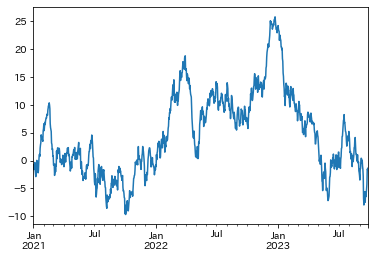

In [180]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2021", periods=1000))
ts = ts.cumsum()
ts.plot()

In [176]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

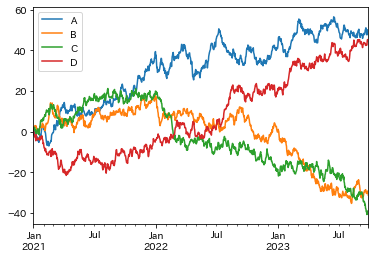

In [179]:
plt.figure()
df.plot()
plt.legend(loc="best")

## Getting data in/out

In [181]:
# df.to_csv("foo.csv")
# pd.read_csv("foo.csv")
# df.to_hdf("foo.h5", "df")
# pd.read_hdf("foo.h5", "df")
# df.to_excel("foo.xlsx", sheet_name="Sheet1")
# pd.read_excel("foo.xlsx", index_col=None, na_values=["NA"])